In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import savgol_filter, general_gaussian
import sklearn.linear_model as linear_model

def Gauss(x, mu, sigma, A = 1):
    # returns the Gaussian function of x
    # x = an array
    # mu = the expected value
    # sigma = the square root of the variance
    # A = a multiplication factor
    
    gaussian = A/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
    
    return gaussian

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


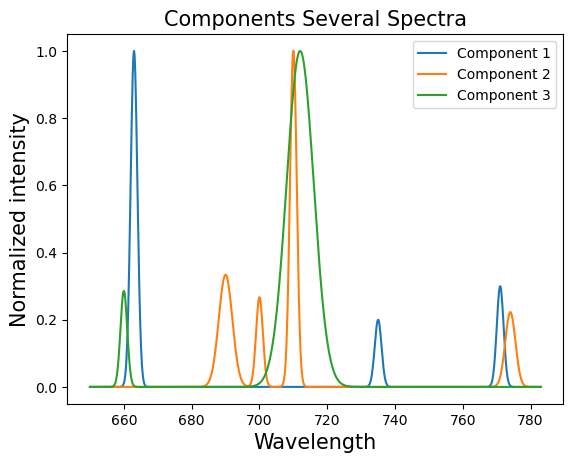

In [2]:
# Creation of components

# X-axis (Wavelengths)
x_range =  np.linspace(650, 783, 1024)

# Y-axis (Intensity)
# Component 1
mu_a1 = 663
sigma_a1 = 1
intensity_a1 = 1

mu_a2 = 735
sigma_a2 = 1
intensity_a2 = 0.2

mu_a3 = 771
sigma_a3 = 1
intensity_a3 = 0.3

gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1) + Gauss(x_range, mu_a2, sigma_a2, intensity_a2) + Gauss(x_range, mu_a3, sigma_a3, intensity_a3)

# Component 2
mu_b = 700
sigma_b = 1
intensity_b = 0.2

mu_b1 = 690
sigma_b1 = 2
intensity_b1 = 0.5

mu_b2 = 710
sigma_b2 = 1
intensity_b2 = 0.75

mu_b3 = 774
sigma_b3 = 1.5
intensity_b3 = 0.25

gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b) + Gauss(x_range, mu_b1, sigma_b1, intensity_b1) + Gauss(x_range, mu_b2, sigma_b2, intensity_b2) + Gauss(x_range, mu_b3, sigma_b3, intensity_b3)

# Component 3
mu_c1 = 660
sigma_c1 = 1
intensity_c1 = 0.05

mu_c2 = 712
sigma_c2 = 4
intensity_c2 = 0.7

gauss_c = Gauss(x_range, mu_c1, sigma_c1, intensity_c1) + Gauss(x_range, mu_c2, sigma_c2, intensity_c2)

# Normalization of components
component_a = gauss_a/np.max(gauss_a)
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)

# Plotting
plt.plot(x_range, component_a, label = 'Component 1')
plt.plot(x_range, component_b, label = 'Component 2')
plt.plot(x_range, component_c, label = 'Component 3')
plt.title('Components Several Spectra', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

# Create a new DataFrame with the spectra
components_df = pd.DataFrame({'Component A': component_a, 'Component B': component_b, 'Component C': component_c}, index=x_range)

# Save the components to CSV files
components_df.to_csv('components.csv')

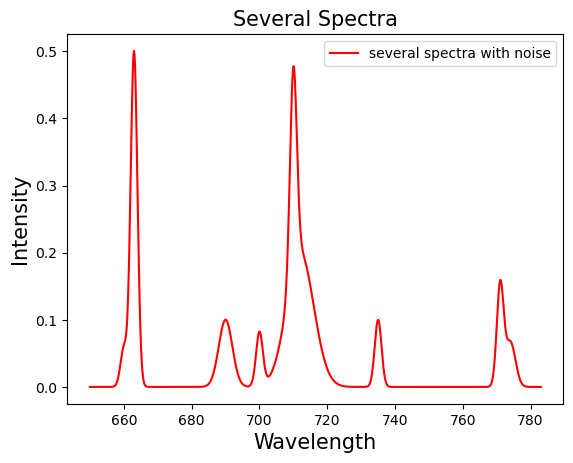

In [3]:
# Creation of spectrum base on previous components

# Concentrations of components
c_a = 0.5
c_b = 0.3
c_c = 0.2

comps = np.array([c_a, c_b, c_c])

# Creation of several spectra graphic based on previous components
several_spectra = c_a * component_a + c_b * component_b + c_c *component_c

# Plotting
plt.plot(x_range, several_spectra, color = 'red', label = 'several spectra with noise')
plt.title('Several Spectra', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.legend()  # Adding a legend to the plot
plt.show()

# Create a new DataFrame with the spectra
several_spectra_df = pd.DataFrame({'Intensity': several_spectra}, index=x_range)

# Save the data to a new CSV file
several_spectra_df.to_csv('several_spectra.csv')

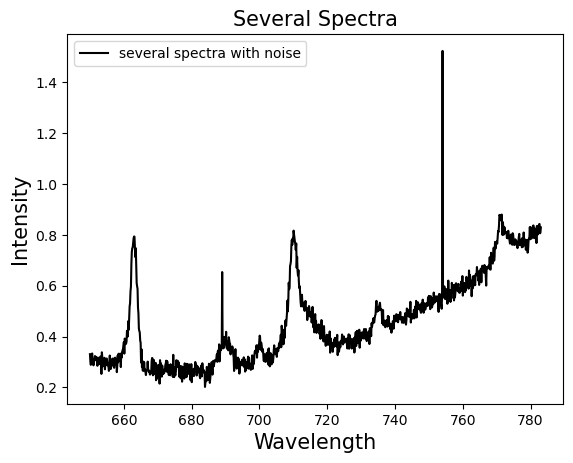

In [4]:
# Noise addition

# Random noise
several_spectra = several_spectra + np.random.normal(0, 0.02, len(x_range))

# Spikes
several_spectra[800] = several_spectra[800] + 1
several_spectra[300] = several_spectra[300] + 0.3

# Fluorescence (baseline as polynomial background)
poly = 0.2 * np.ones(len(x_range)) + 0.0001 * x_range + 0.000051 * (x_range - 680)**2 
several_spectra = several_spectra + poly

# Plotting
plt.plot(x_range, several_spectra, color = 'black', label = 'several spectra with noise')
plt.title('Several Spectra', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.legend()
plt.show()

# Create a new DataFrame with the spectra
several_spectra_df = pd.DataFrame({'Wavelength': x_range, 'Intensity': several_spectra})

# Save the corrected data to a new CSV file
several_spectra_df.to_csv('several_spectra_noise.csv', index=False)